In [2]:
import numpy as np

# Plotting and visualization
import matplotlib.pyplot as plt

import os

# Data manipulation
import pandas as pd

In [6]:
elec_prices = pd.read_csv('electricity_prices.csv')
c_el_w = elec_prices['Low Season Weekday'].values #price $/kWh 
c_el_week = np.tile(c_el_w, 5)

c_el_wk = elec_prices['Low Season Weekend'].values #price $/kWh 
c_el_weekend = np.tile(c_el_wk, 2)

c_el_week_full = np.concatenate((c_el_week, c_el_weekend))


forecasts = pd.read_csv('forecasts_winter2.csv')
pv = forecasts['P_PV'].values 
load = forecasts['P_load'].values

SOE_initial = 2500  # Initial state of energy of the battery
LOH_initial = 0.5  # Initial level of hydrogen

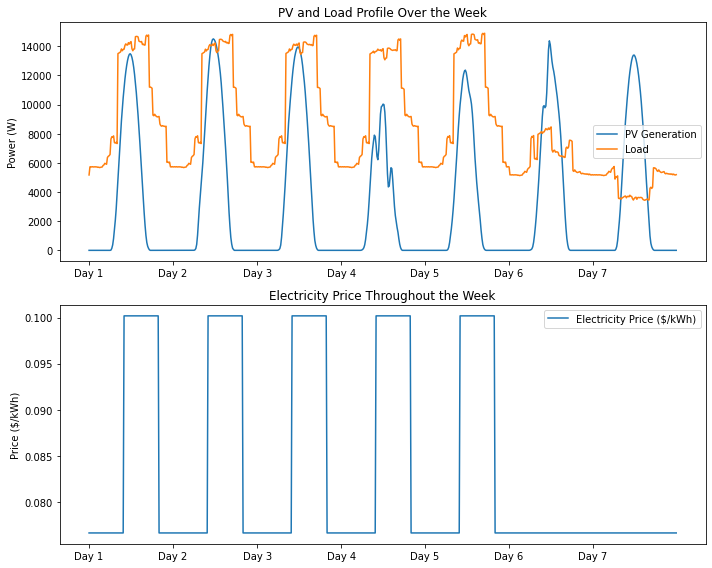

In [7]:
# Define the x-axis as days of the week
num_days = 7
time_intervals_per_day = 24 * 4  # 15-minute intervals per day
days = np.arange(0, num_days, 1/time_intervals_per_day)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot PV and load profile
ax1.plot(days, pv[:672], label='PV Generation')
ax1.plot(days, load[:672], label='Load')
ax1.set_ylabel('Power (W)')
ax1.set_title('PV and Load Profile Over the Week')
ax1.set_xticks(np.arange(num_days))
ax1.set_xticklabels([f'Day {i+1}' for i in range(num_days)])
ax1.legend()

# Plot electricity price profile
ax2.plot(days, c_el_week_full, label='Electricity Price ($/kWh)')
ax2.set_ylabel('Price ($/kWh)')
ax2.set_title('Electricity Price Throughout the Week')
ax2.set_xticks(np.arange(num_days))
ax2.set_xticklabels([f'Day {i+1}' for i in range(num_days)])
ax2.legend()

plt.savefig('summer_scenario.pdf', format='pdf')


# Display the plot
plt.tight_layout()
plt.show()